In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'viridis'

In [33]:
from pathlib import Path
import numpy as np
import pandas as pd
from skimage.io import imread as imread
from skimage.util import montage as montage2d
from skimage.color import label2rgb
from PIL import Image
base_dir = Path('..') / 'recipe'

In [34]:
#reads a JSON file and creates a Pandas dataframe, then prints the number of rows in the dataframe 
image_overview_df = pd.read_json(base_dir/ 'image_subset.json')
print(image_overview_df.shape[0], 'image, recipe pairs loaded')
image_overview_df.sample(3)

9653 image, recipe pairs loaded


id      image_path  \
1157  6fd042c6d5  1f8b8323f7.jpg   
3589  df8a0d65bc  6126f4e7ca.jpg   
8366  c3ac10a813  ddd659c323.jpg   

                                                 images  \
1157  [{'id': '02a2470061.jpg', 'url': 'http://image...   
3589  [{'id': '2164c3fbf1.jpg', 'url': 'http://img.s...   
8366  [{'id': '91e776daaa.jpg', 'url': 'http://img.s...   

                                            ingredients  \
1157  [{'text': '1 1/2 cups all-purpose flour'}, {'t...   
3589  [{'text': '4 boneless skinless chicken breasts...   
8366  [{'text': '2 (1 lb) lobsters'}, {'text': '3 ta...   

                                           instructions partition  \
1157  [{'text': 'Preheat oven to 350 degrees F (175 ...       val   
3589  [{'text': 'Marinate the chicken w/ the juice o...       val   
8366  [{'text': 'In a large stockpot, bring 2 quarts...       val   

                                             title  \
1157                        All American Apple Pie   
3589  Garlic Lime Grilled Chicken With Mango Salsa   
8366                            Warm Lobster Rolls   

                                       ingredients_list  \
1157  [1 1/2 cups all-purpose flour, 1/2 cup vegetab...   
3589  [4 boneless skinless chicken breasts, 1 large ...   
8366  [2 (1 lb) lobsters, 3 tablespoons unsalted but...   

                                 clean_ingredients_list  \
1157  [all - purpose flour, vegetable oil, milk, whi...   
3589  [boneless skinless chicken breasts, lime, garl...   
8366  [lobsters, unsalted butter, garlic clove, kosh...   

                                        top_ingredients  
1157  [all - purpose flour, vegetable oil, milk, whi...  
3589  [boneless skinless chicken breasts, garlic clo...  
8366       [unsalted butter, garlic clove, kosher salt]

In [35]:
simple_images_df = image_overview_df[['id','image_path','title','top_ingredients']]
simple_images_df.head(3)

id      image_path                                 title  \
0  712a33dc5a  000069bf1c.jpg                      Key West Fillets   
1  92b599175b  0012bb6758.jpg                       Nutella Granola   
2  aa4feaf24f  00139141ff.jpg  Cream Cheese and Pepper Jelly Spread   

                                  top_ingredients  
0  [butter, parmesan cheese, salt, garlic powder]  
1                       [brown sugar, canola oil]  
2                                  [cream cheese]

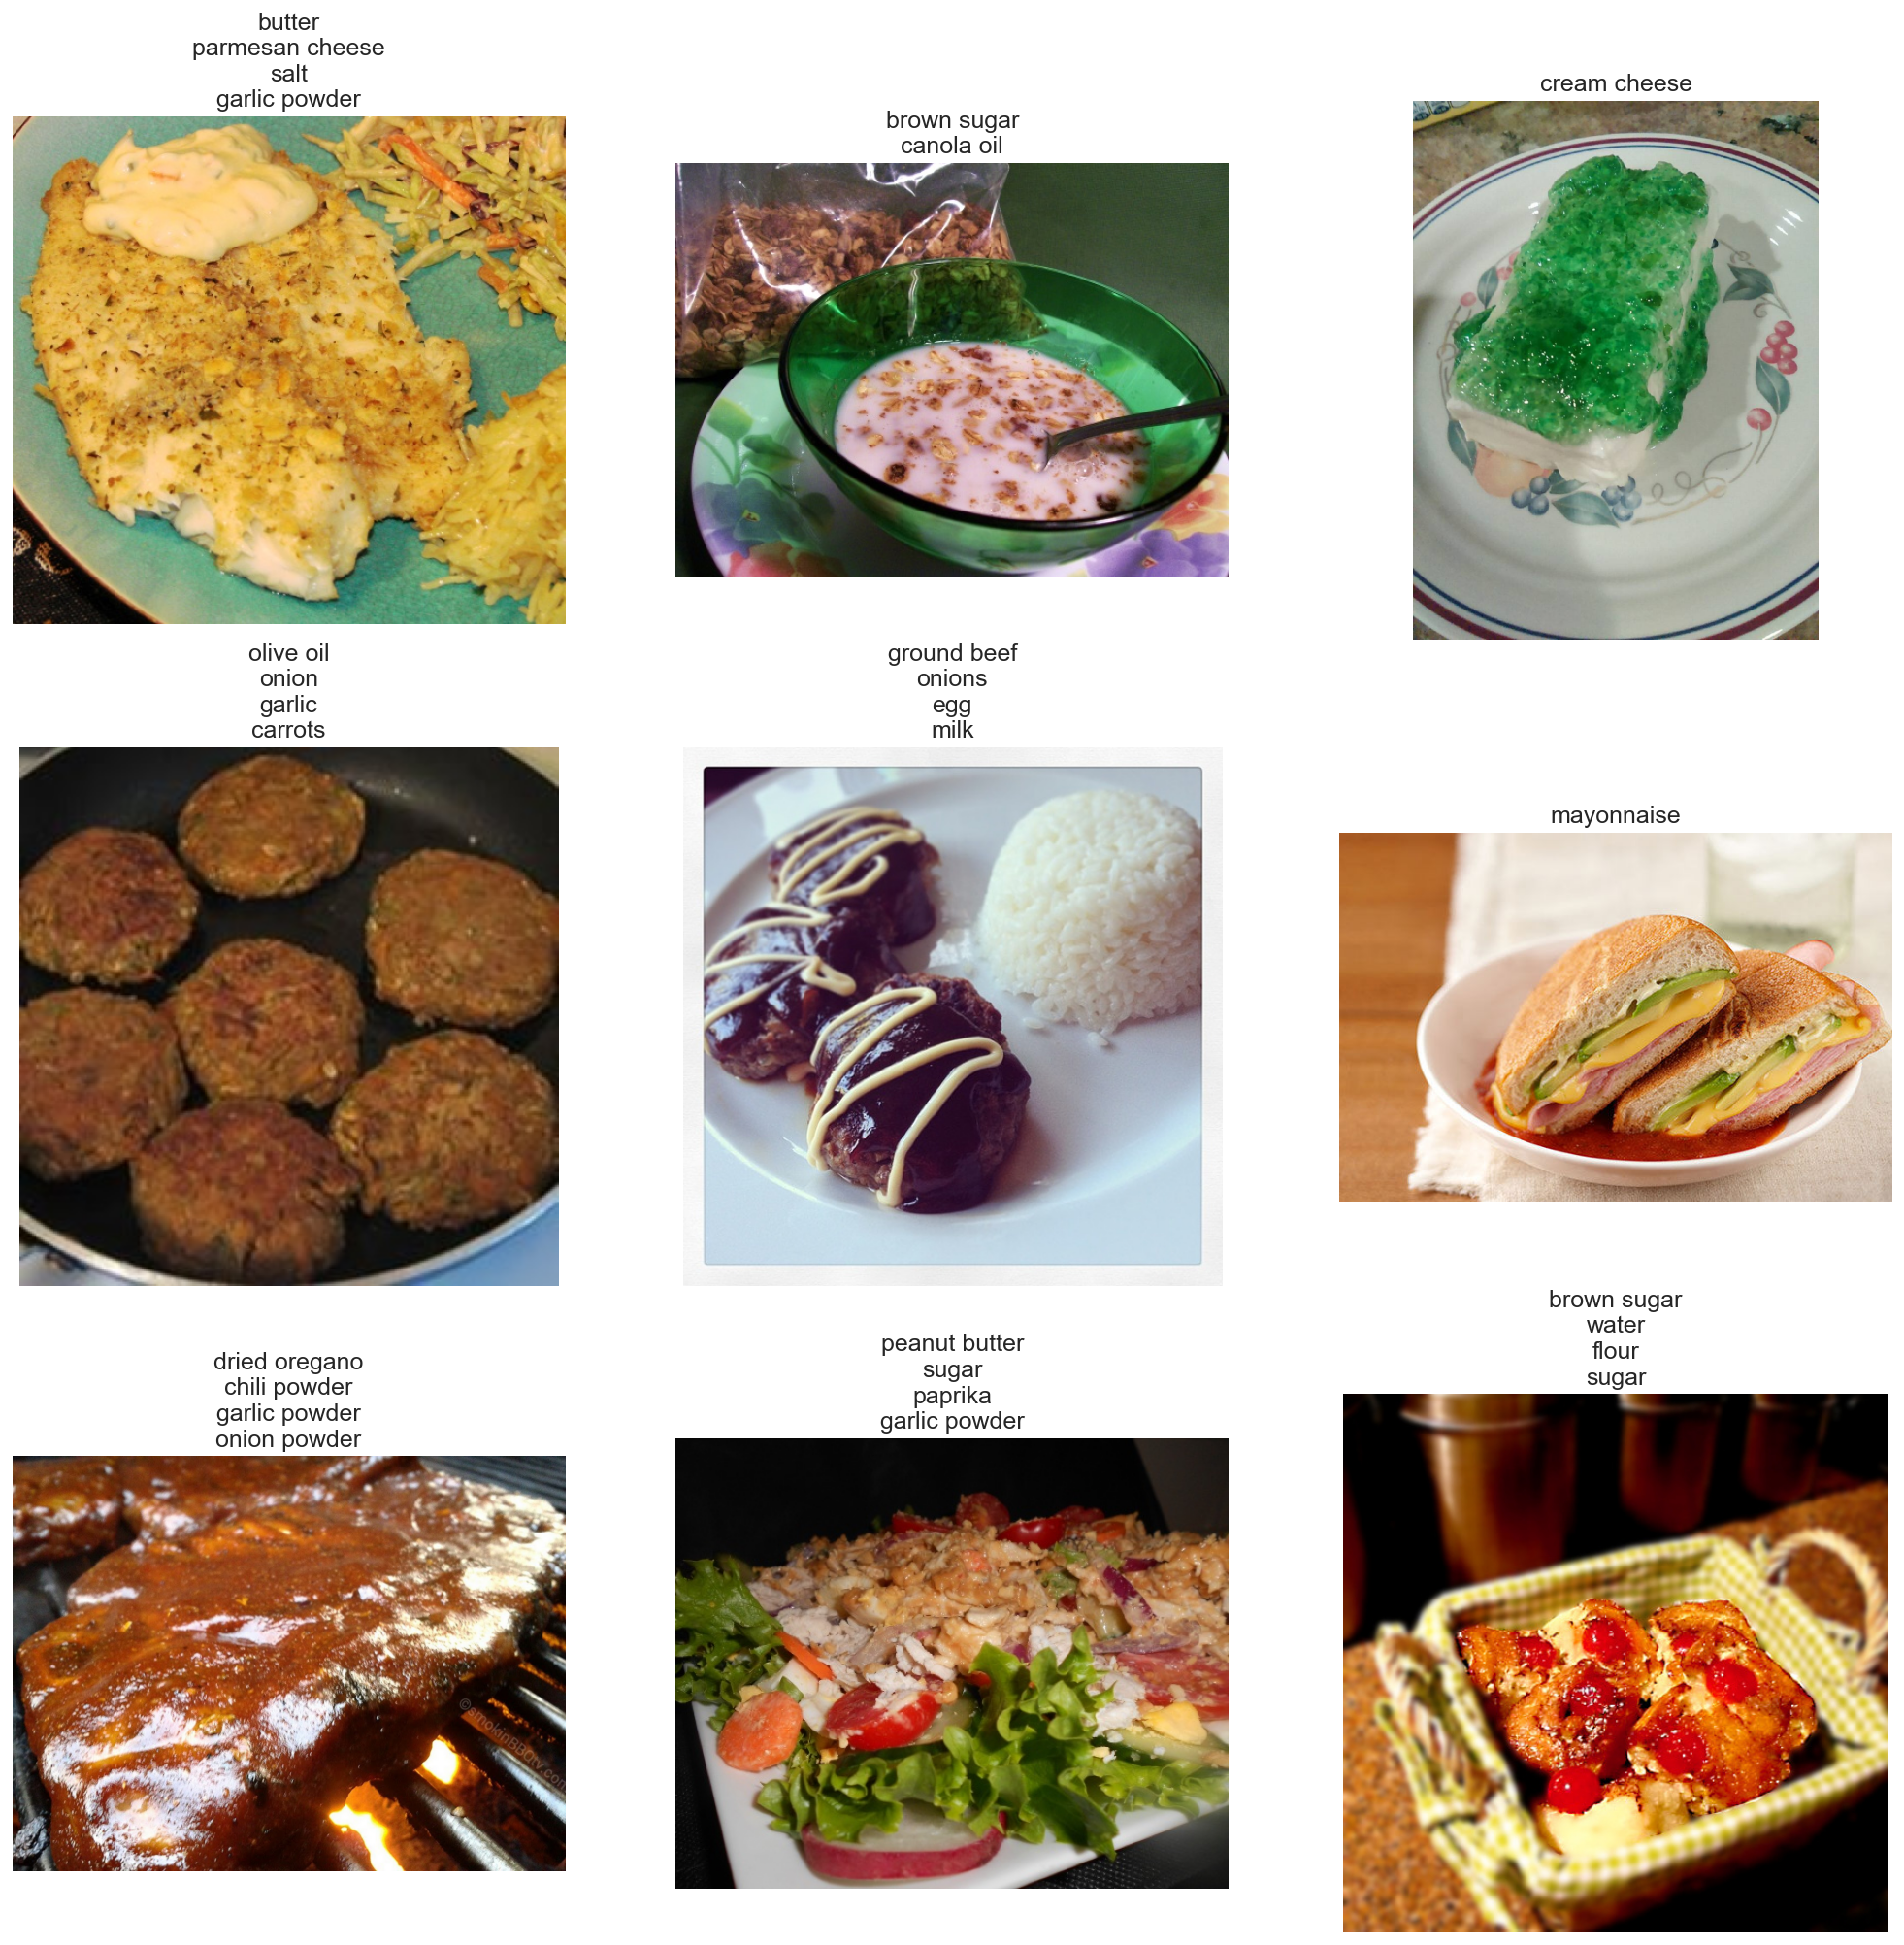

In [36]:
#displays images and their top 4 ingredients on each subplot, and turns off the axes for each subplot.
fig, m_axs = plt.subplots(3, 3, figsize=(20, 20))
for c_ax, (_, c_row) in zip(m_axs.flatten(), 
                            simple_images_df.head(9).iterrows()):
    c_ax.imshow(imread(base_dir / 'subset' / c_row['image_path']))
    c_ax.set_title('\n'.join(c_row['top_ingredients'][:4]))
    c_ax.axis('off')

In [37]:
test_row = simple_images_df.iloc[1]
print(test_row)

id                                92b599175b
image_path                    0012bb6758.jpg
title                        Nutella Granola
top_ingredients    [brown sugar, canola oil]
Name: 1, dtype: object


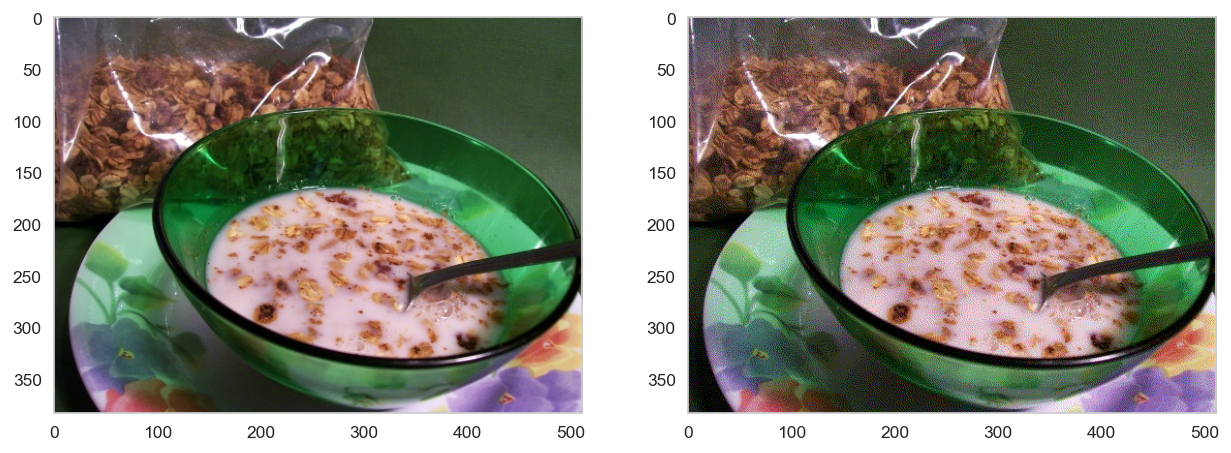

In [38]:
#creates a 1x2 plot using Matplotlib and displays the original image and the 8-bit color image on the two subplots respectively.
test_image = Image.open(base_dir / 'subset' / test_row['image_path']) # normal image
# converting it to 8 bit color (animated GIF) and then back
web_image = test_image.convert('P', palette='WEB', dither=None)
few_color_image = web_image.convert('RGB')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(test_image)
ax2.imshow(few_color_image)

In [39]:
#transforming the image arrays into 1D arrays of RGB values
#finding the number of unique RGB tuples in each array using a set.
print('Unique colors before', len(set([tuple(rgb) for rgb in np.array(test_image).reshape((-1, 3))])))
print('Unique colors after', len(set([tuple(rgb) for rgb in np.array(few_color_image).reshape((-1, 3))])))

Unique colors before 97663
Unique colors after 102


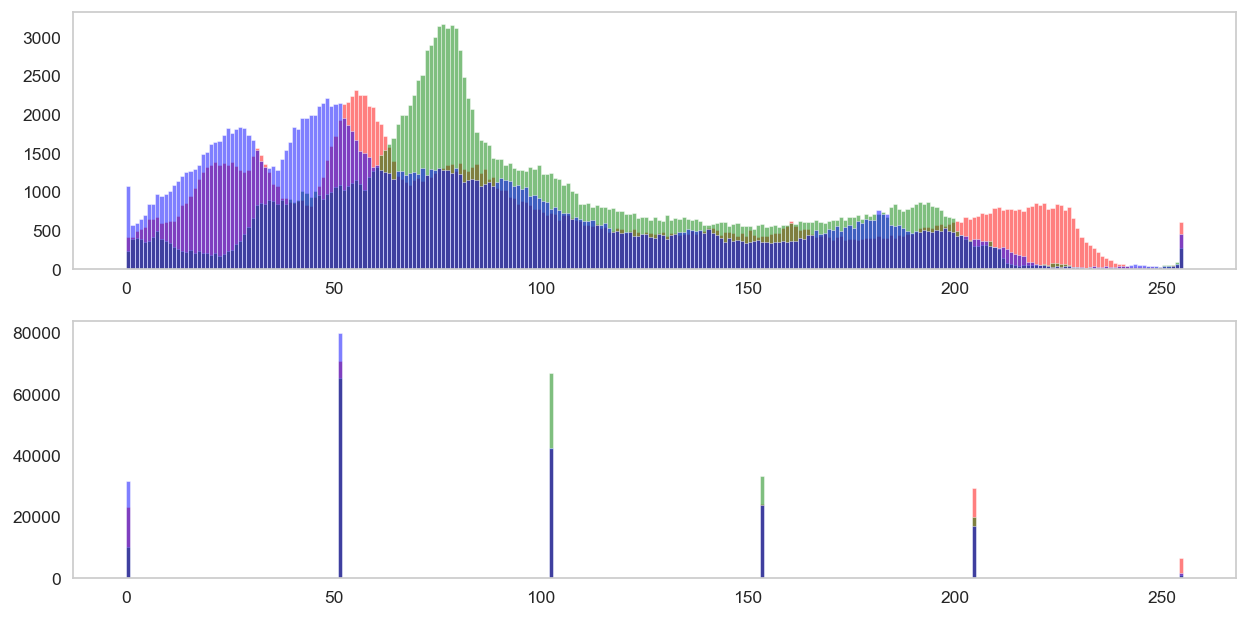

In [40]:
#plots histograms of each color channel of the original image (test_image) 
#the image is converted to 8-bit color (few_color_image)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6)) #The x-axis shows the intensities of each color channel ranging from 0-255 
for c_channel, c_name in enumerate(['red', 'green', 'blue']):#y-axis shows the count of pixels with that intensity.
    ax1.hist(np.array(test_image)[:, :, c_channel].ravel(), 
             color=c_name[0], 
             label=c_name, 
             bins=np.arange(256), 
             alpha=0.5)
    ax2.hist(np.array(few_color_image)[:, :, c_channel].ravel(), 
             color=c_name[0], 
             label=c_name, 
             bins=np.arange(256), 
             alpha=0.5)

In [41]:
#getpalette used to retrieve the palette, reshaped into an Nx3 array, where N is the number of colors in the palette, 
#and each row represents the RGB values for a single color.
#The values are then divided by 255.0 to normalize the RGB values between 0 and 1.
idx_to_color = np.array(web_image.getpalette()).reshape((-1, 3))/255.0

Text(0, 0.5, 'Pixel Count')

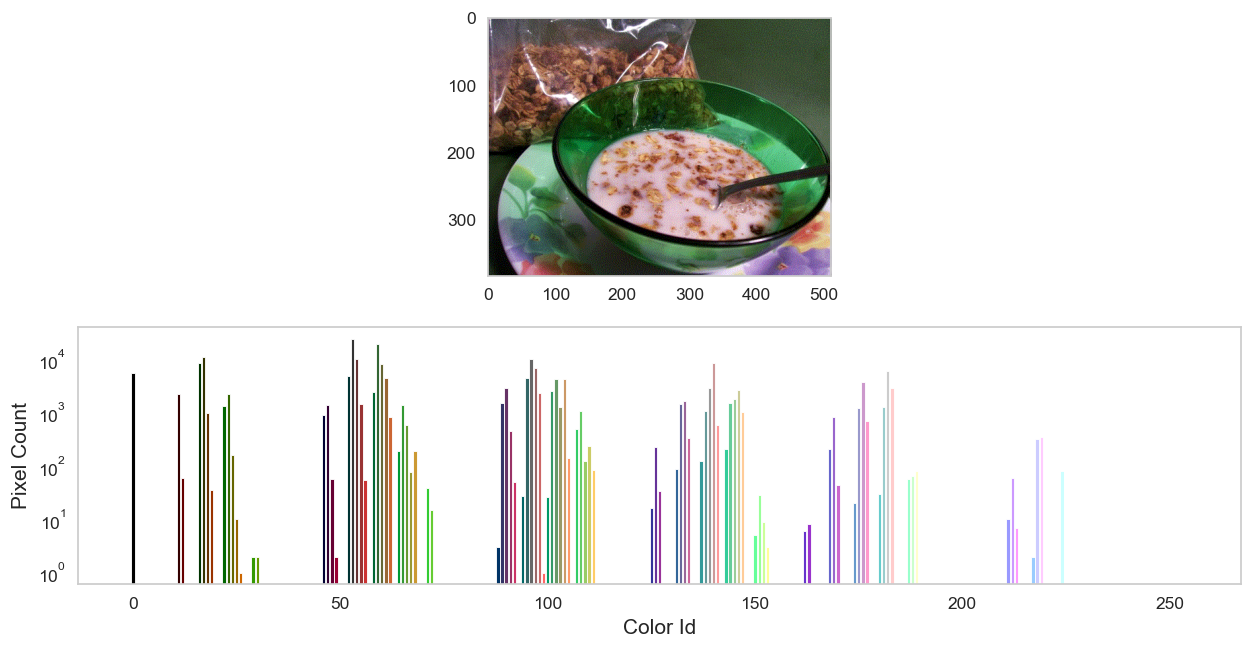

In [42]:
#color of each bar in the histogram is determined by the RGB value corresponding to the color index, 
#which is looked up in the "idx_to_color" array.
#The vertical axis of the histogram is displayed on a log scale
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
ax1.imshow(few_color_image)
counts, bins = np.histogram(web_image, bins=np.arange(256))
for i in range(counts.shape[0]):
    ax2.bar(bins[i], counts[i], color=idx_to_color[i])
ax2.set_yscale('log')
ax2.set_xlabel('Color Id')
ax2.set_ylabel('Pixel Count')

In [43]:
#opening the image file located at the path base_dir using the Image library, 
#converting it to a web-based palette using the .convert method, and computes the histogram of pixel values. 
def color_count_feature(in_path):
    raw_image = Image.open(base_dir / 'subset' / in_path) 
    web_image = raw_image.convert('P', palette='WEB', dither=None)
    counts, bins = np.histogram(np.array(web_image).ravel(), bins=np.arange(256))
    return counts*1.0/np.prod(web_image.size)

In [44]:
# new column color_features is added to the image_subset_df dataframe by 
# applying the color_count_feature function on each value of the image_path column
%%time
image_subset_df = simple_images_df.sample(100).copy()
image_subset_df['color_features'] = image_subset_df['image_path'].map(color_count_feature)
image_subset_df.sample(3)

CPU times: total: 7.39 s
Wall time: 7.74 s


id      image_path                            title  \
2719  d2254adee0  4b4ff94158.jpg  Sweet, sticky and spicy chicken   
119   909211b913  03745a9429.jpg      North Croatian Roasted Duck   
8993  354ecdce1e  eeecbf7043.jpg        Cucumber-Watermelon Salad   

                                        top_ingredients  \
2719  [brown sugar, honey, soy sauce, garlic, salt a...   
119                                              [salt]   
8993                                [salt, white sugar]   

                                         color_features  
2719  [0.025679270426432293, 0.0, 0.0, 0.0, 0.0, 0.0...  
119   [0.00726318359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  
8993  [0.003997802734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0...

C:\Users\Nathamayil\AppData\Local\Temp\ipykernel_4248\185556786.py:8: RuntimeWarning: invalid value encountered in divide
  ax2.imshow(combined_features/color_wise_average, vmin=0.05, vmax=20)


Text(0, 0.5, 'Frequency')

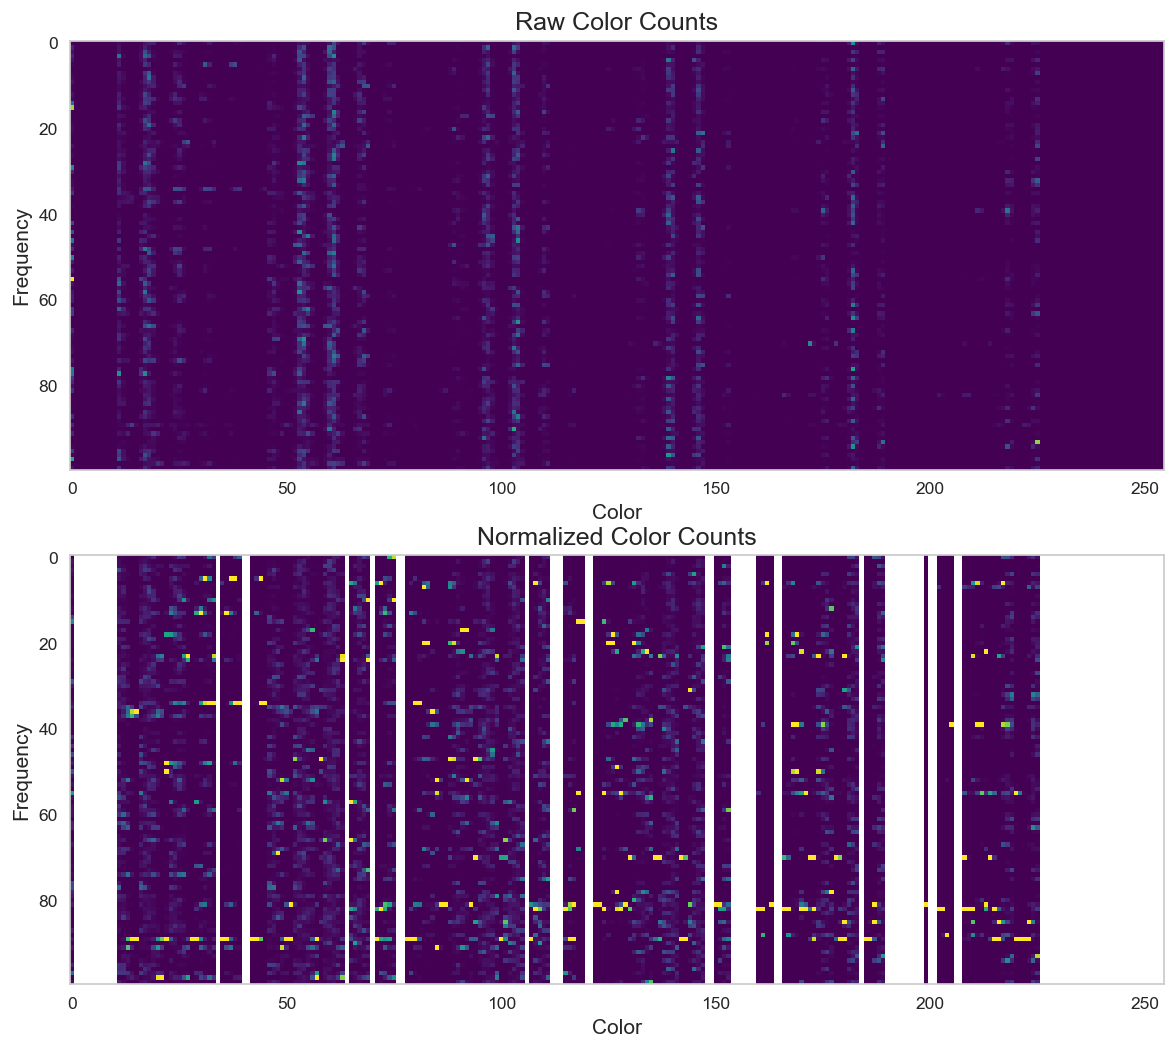

In [45]:
#raw color counts are obtained by stacking the color feature values in the image_subset_df and plotting them,
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
combined_features = np.stack(image_subset_df['color_features'].values, 0)
ax1.imshow(combined_features)
ax1.set_title('Raw Color Counts')
ax1.set_xlabel('Color')
ax1.set_ylabel('Frequency')
#the normalized color counts are obtained by dividing the raw counts by the mean color-wise average frequency
color_wise_average = np.tile(np.mean(combined_features, 0, keepdims=True), (combined_features.shape[0], 1))
ax2.imshow(combined_features/color_wise_average, vmin=0.05, vmax=20)
ax2.set_title('Normalized Color Counts')
ax2.set_xlabel('Color')
ax2.set_ylabel('Frequency')

In [46]:
#PCA to reduce the dimensionality of the combined color features of 100 images from 256-dimensional to 2-dimensional. 
#The 2-dimensional PCA results are stored in 'xy_coords' as x and y coordinates
from sklearn.decomposition import PCA
xy_pca = PCA(n_components=2)
xy_coords = xy_pca.fit_transform(combined_features)
image_subset_df['x'] = xy_coords[:, 0]
image_subset_df['y'] = xy_coords[:, 1]

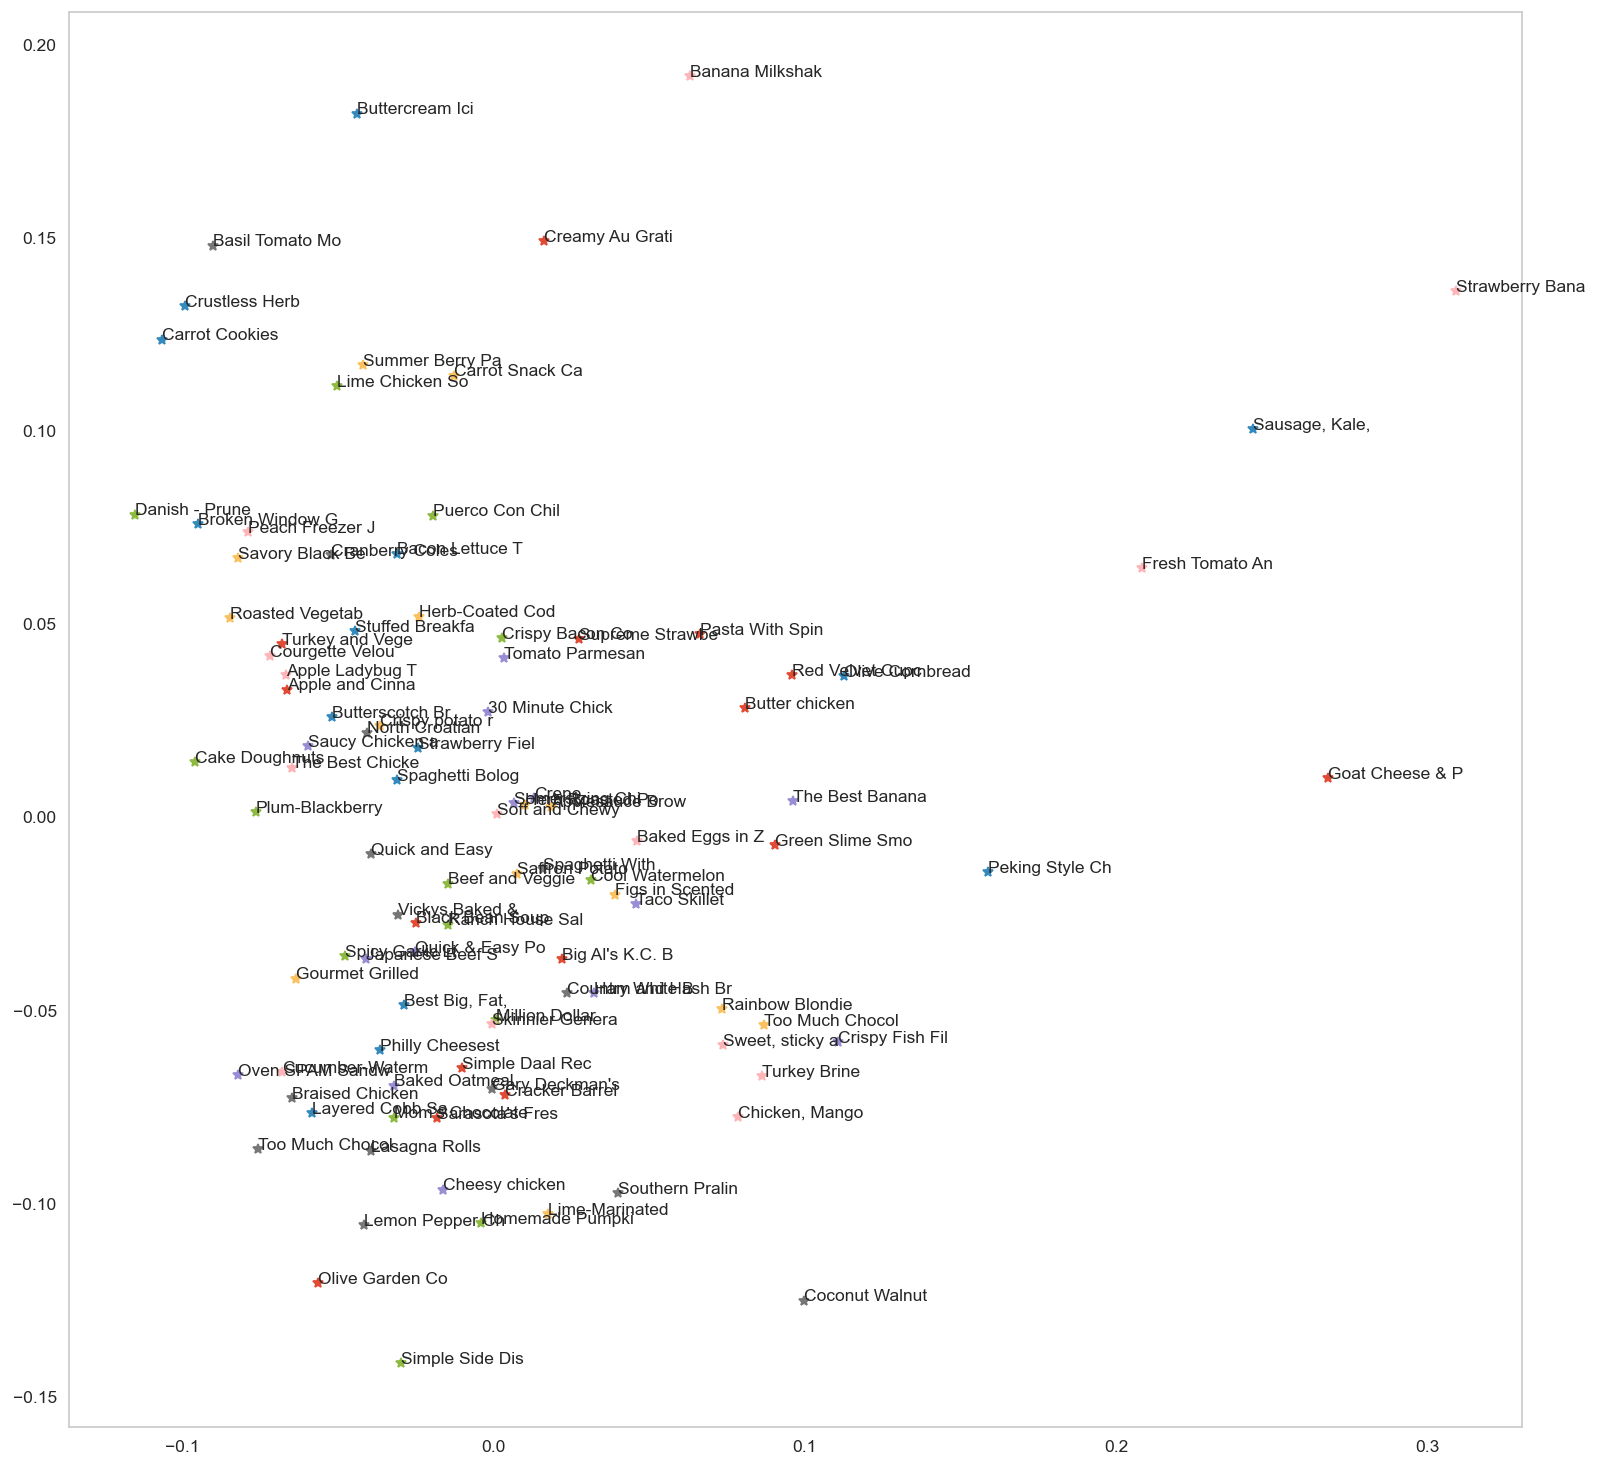

In [47]:
#each row of data from image_subset_df represented as a point on the plot
fig, ax1 = plt.subplots(1,1, figsize=(15, 15))
for _, c_row in image_subset_df.iterrows():
    ax1.plot(c_row['x'], c_row['y'], '*')
    ax1.text(s=c_row['title'][:15], x=c_row['x'], y=c_row['y'])

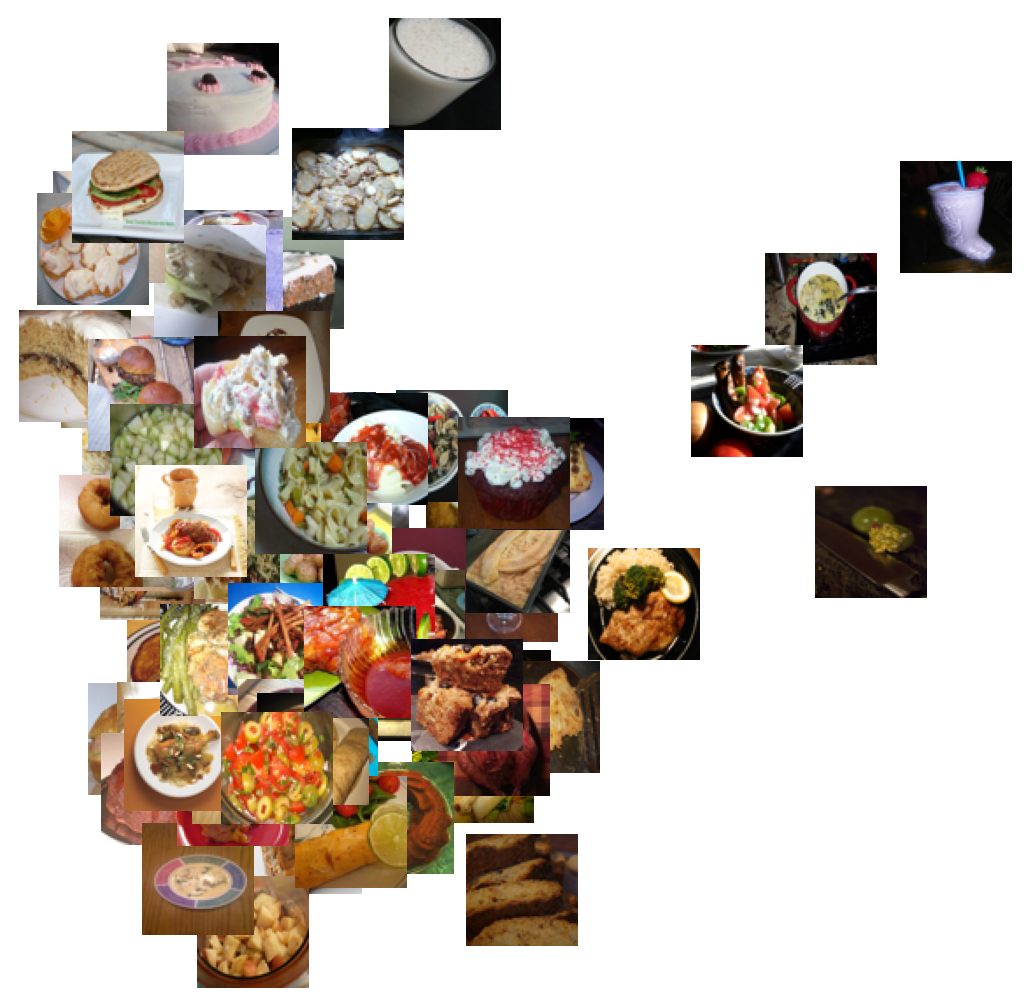

In [48]:
#loop to go through each row of the dataframe. For each row, the function opens an image at the location specified in the
#image_path column of the row and resizes it to 64x64 pixels.
def show_xy_images(in_df, image_zoom=1):
    fig, ax1 = plt.subplots(1,1, figsize=(10, 10))
    artists = []
    for _, c_row in in_df.iterrows():
        #uses matplotlib's OffsetImage method to 
#create an image object from the image data and specifies an AnnotationBbox with the image object
        c_img = Image.open(base_dir / 'subset' / c_row['image_path']).resize((64, 64))
        img = OffsetImage(c_img, zoom=image_zoom)
        ab = AnnotationBbox(img, (c_row['x'], c_row['y']), xycoords='data', frameon=False)
        artists.append(ax1.add_artist(ab))
#the x and y coordinates from the dataframe, and the coordinate system as 'data'. 
#the function appends this artist to the list artists
    ax1.update_datalim(in_df[['x', 'y']])
    ax1.autoscale()
    ax1.axis('off')
show_xy_images(image_subset_df)

In [49]:
#t-SNE (t-distributed Stochastic Neighbor Embedding) algorithm to reduce the high-dimensional data in 
#combined_features to 2 dimensions and represent it as "xy_coords"
#The t-SNE algorithm is used for visualization of high-dimensional data. 
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=250, verbose=True)
#The parameters passed to the t-SNE object include number of iterations as 250 and verbose as True, 
#which means the algorithm will report its progress during the fitting process.
xy_coords = tsne.fit_transform(combined_features)
image_subset_df['x'] = xy_coords[:, 0]
image_subset_df['y'] = xy_coords[:, 1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.095398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.272301
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


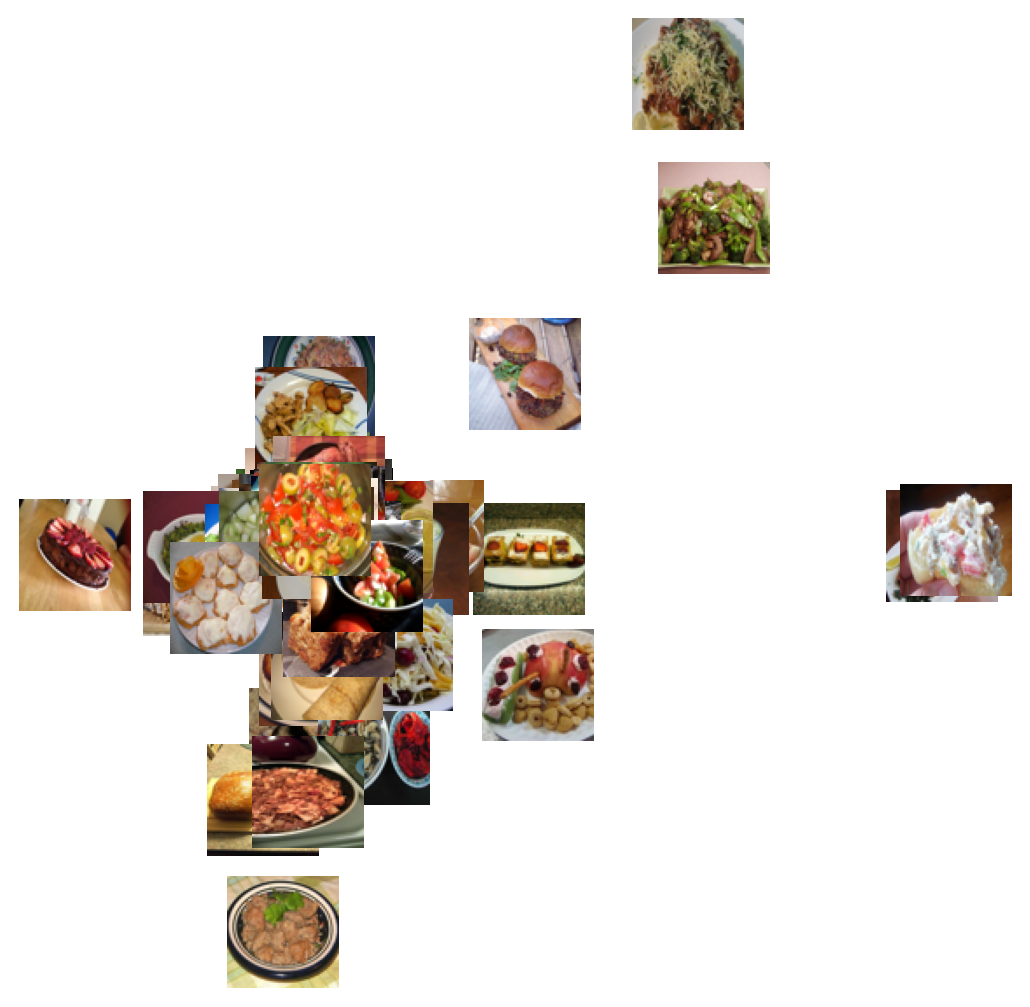

In [50]:
show_xy_images(image_subset_df)

In [51]:
#applying the color_count_feature function to each element of the image_path column in the simple_images_df dataframe. 
#output is then mapped again using the map method to convert each output element (a numpy array) to a list. 
%%time
simple_images_df['color_features'] = simple_images_df['image_path'].map(color_count_feature).map(lambda x: x.tolist())
simple_images_df.sample(3)

CPU times: total: 11min 27s
Wall time: 12min 2s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


id      image_path                        title  \
1179  21d41bca30  203ec36381.jpg      Edamame Pate Sandwiches   
2111  7040507a3e  3a4ff17d8e.jpg  Best Chocolate Chip Cookies   
6392  29d860fb20  a98eb9929e.jpg       Eight-Jewel Fried Rice   

                                        top_ingredients  \
1179                       [walnuts, salt, lemon juice]   
2111  [butter, white sugar, brown sugar, eggs, vanil...   
6392                 [oil, green onions, garlic cloves]   

                                         color_features  
1179  [0.026893113645965357, 0.0, 0.0, 0.0, 0.0, 0.0...  
2111  [0.03558349609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  
6392  [0.004391007217219136, 0.0, 0.0, 0.0, 0.0, 0.0...

In [52]:
simple_images_df.to_json('color_features.json')